In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.integrate import odeint

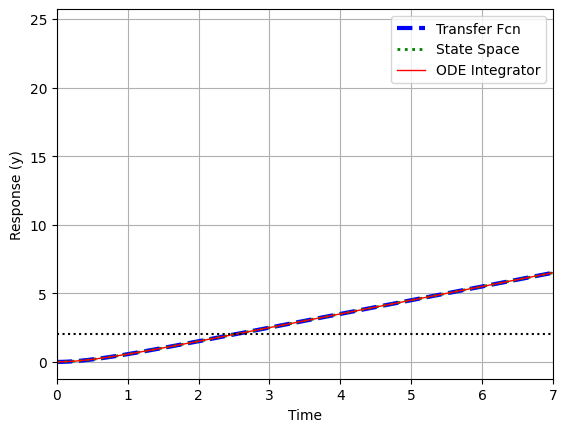

In [34]:
# parameters
kp = 2.0
J = 1
b = 2.0
du =1.0

# PID constants 

KI = 1
KP = 1
KD = 1

# transfer function PID C(s)

num2 = [KP]
den2 = [1]
sys_p = signal.TransferFunction(num2, den2)
t3, y3 = signal.step(sys_p)

# transfer function H(s)

num = [kp]
den = [J, b, 0]
sys1 = signal.TransferFunction(num, den)
t1, y1 = signal.step(sys1) 

# multiply M(s)

# mr = signal.TransferFunction.

# State space :)

A = [[0.0, 1.0], [0.0,-b/J]]
B = [[0.0], [kp/J]]
C = [1.0,0.0]
D = 0.0
sys2 = signal.StateSpace(A,B,C,D)
t2,y2 = signal.step(sys2)

# 
# mr = signal.StateSpace.__mul__(sys1, sys_p)

# ODE integrator

def model3(x,t):
    y = x[0]
    dydt = x[1]
    dy2dt2 = (kp*du - b*dydt)/J
    return [dydt,dy2dt2]

t3 = np.linspace(0,25,100)
x3 = odeint(model3,[0,0],t3)
y3 = x3[:,0]

plt.figure(1)
plt.plot(t1,y1*du,'b--',linewidth=3,label='Transfer Fcn')
plt.plot(t2,y2*du,'g:',linewidth=2,label='State Space')
plt.plot(t3,y3,'r-',linewidth=1,label='ODE Integrator')
y_ss = kp * du

plt.plot([0,max(t1)],[y_ss,y_ss],'k:')
plt.xlim([0,max(t1)])
plt.xlabel('Time')
plt.ylabel('Response (y)')
plt.legend(loc='best')
plt.grid()

# plt.savefig('2nd_order.png')
plt.show()

In [28]:
def series(sys1, sys2):
    """Series connection of two systems.     """ 
    if not isinstance(sys1, signal.lti):
        sys1 = signal.lti(*sys1)
    if not isinstance(sys2, signal.lti):          
        sys2 = signal.lti(*sys2)
    num = np.polymul(sys1.num, sys2.num)     
    den = np.polymul(sys1.den, sys2.den)     
    sys = signal.lti(num, den) 
    return sys
 
def feedback(plant, sensor=None):       
    """Negative feedback connection of plant and sensor.     If sensor is None, then it is assumed to be 1.     """ 
    if not isinstance(plant, signal.lti):         
        plant = signal.lti(*plant) 
    if sensor is None: 
        sensor = signal.lti([1], [1]) 
    elif not isinstance(sensor, signal.lti):         
        sensor = signal.lti(*sensor) 
    num = np.polymul(plant.num, sensor.den)     
    den = np.polyadd(
        np.polymul(plant.den, sensor.den),                      
        np.polymul(plant.num, sensor.num)
    ) 
    sys = signal.lti(num, den)     
    return sys

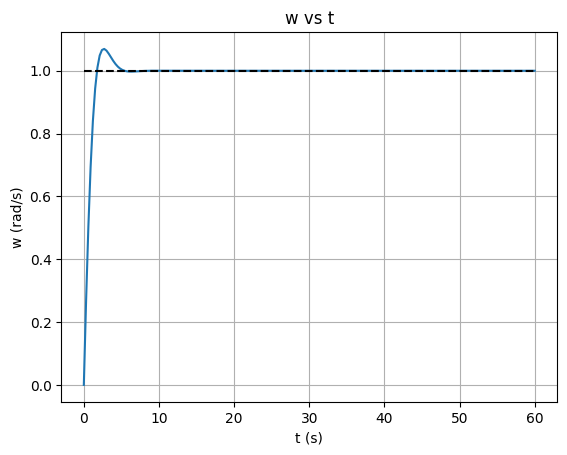

In [35]:
K_p = 200.0
K_i = 50.0
# Sistema controlador-planta
sys_pc = series(([K_p, K_i], [1, 0]), ([kp],[J, b, 0]))
# Sistema realimentado
sys_prop = feedback(sys_pc)
# Respuesta a entrada escalón
t = np.linspace(0, 60, num=200)
t, y = signal.step2(sys_prop, T=t)
plt.grid()
plt.xlabel('t (s)')
plt.ylabel('w (rad/s)')
plt.title('w vs t')
plt.plot(t, y)
plt.plot([0, t[-1]], [1] * 2, 'k--')